<a href="https://colab.research.google.com/github/norannali/Daily-Climate-time-series-data/blob/main/Daily_Climate_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

# **Reading data**

In [ ]:
df_train=pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df_test=pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [ ]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df_train.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [ ]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
df_test.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [ ]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
df_test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


* Data Training,Testing have no Null Values
* Type of date col is datetime64 ,others are float

* Convert 'date' column to datetime and set as index
* (Important for time series analysis and consistent format with train data)

# **Analysis Data**

In [ ]:
# Combine datasets for full analysis
df_full = pd.concat([df_train, df_test], axis=0)

# Convert date to datetime and set as index
df_full['date'] = pd.to_datetime(df_full['date'])
df_full.set_index('date', inplace=True)

In [ ]:
#df_train['date'] = pd.to_datetime(df_train['date'])
#df_train.set_index('date', inplace=True)

In [ ]:
#df_test['date'] = pd.to_datetime(df_test['date'])
#df_test.set_index('date', inplace=True)

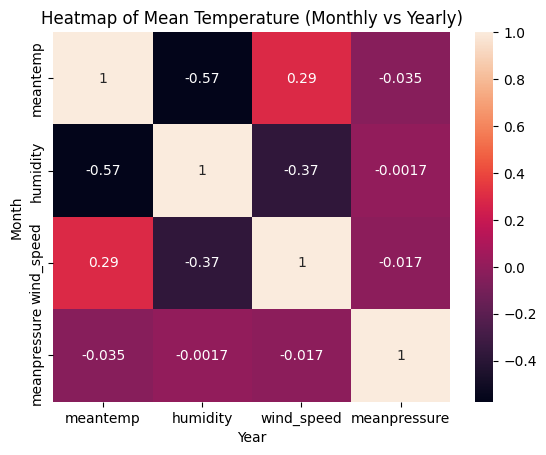

In [ ]:
sns.heatmap(df_full.corr(),annot=True)
plt.title("Heatmap of Mean Temperature (Monthly vs Yearly)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

In [ ]:
def plot_time_series(df, cols, title):
    """Plot time series for specified columns"""
    plt.figure(figsize=(20, 12))
    for col in cols:
        plt.plot(df.index, df[col], label=col)
        plt.title(title, fontsize=14)
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()

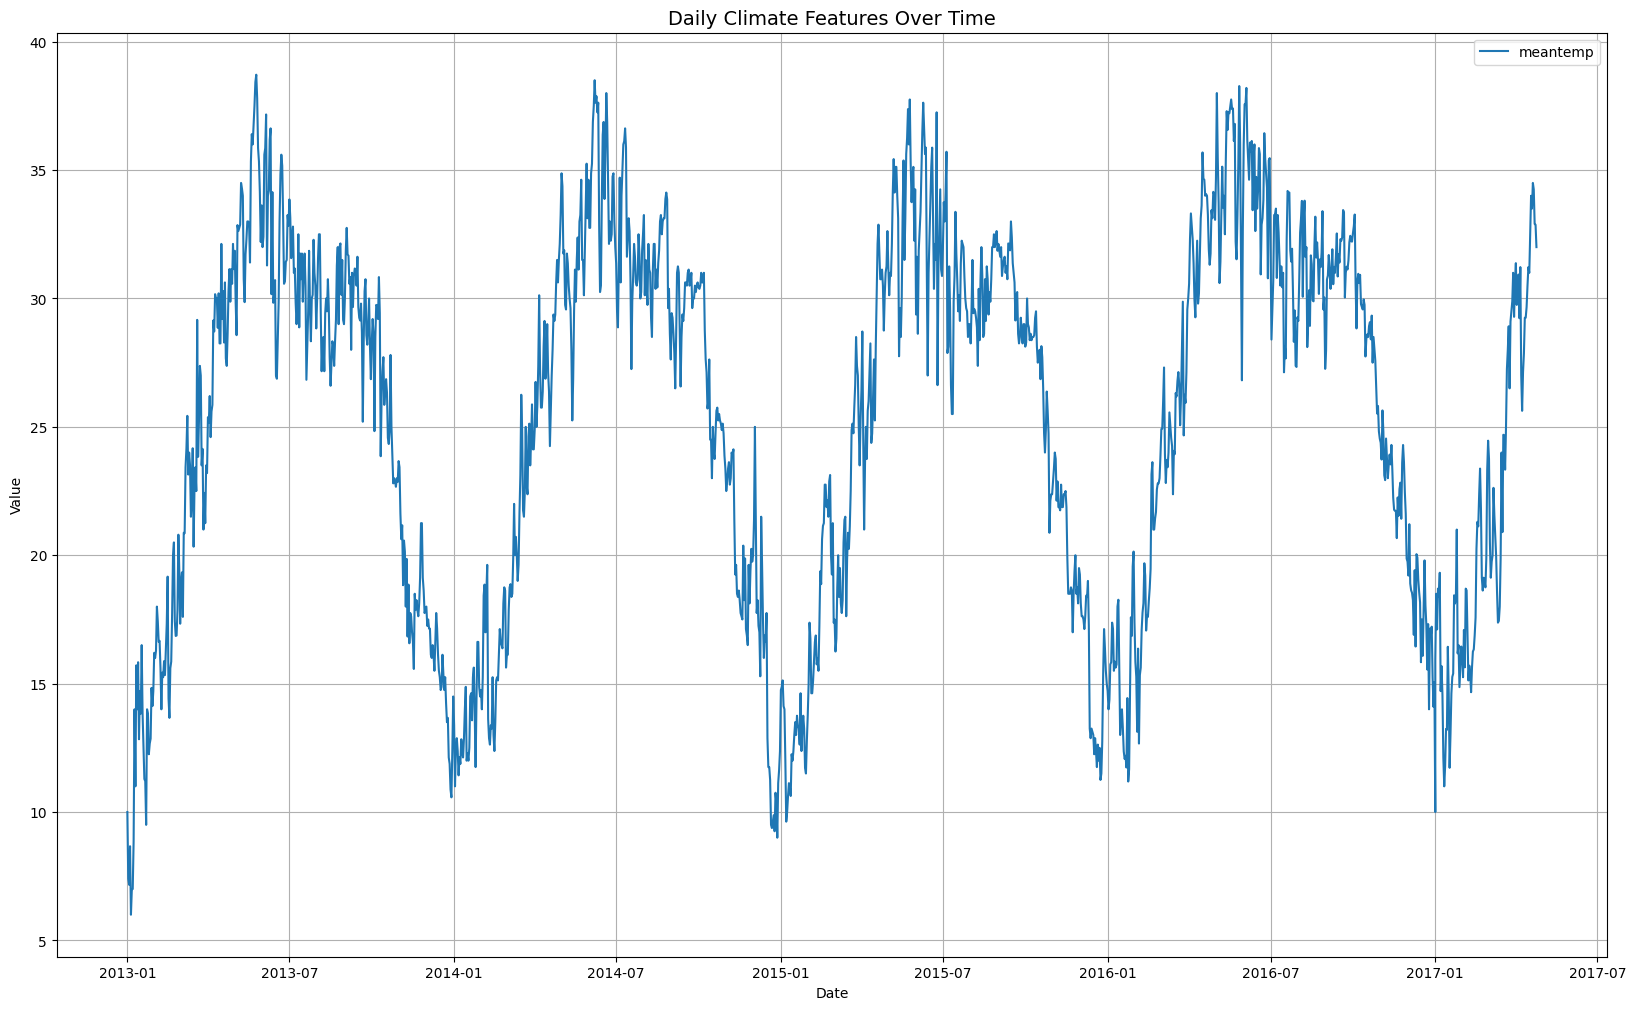

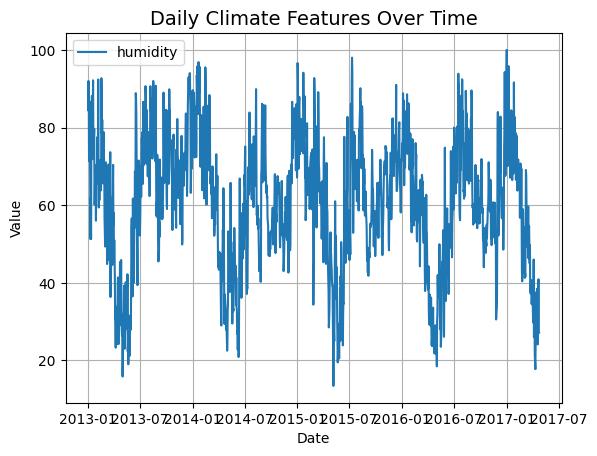

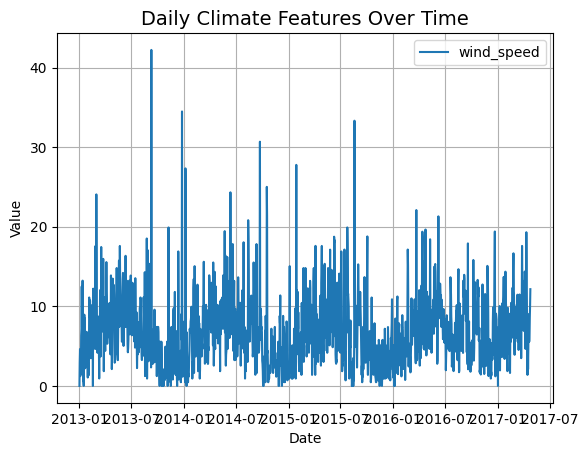

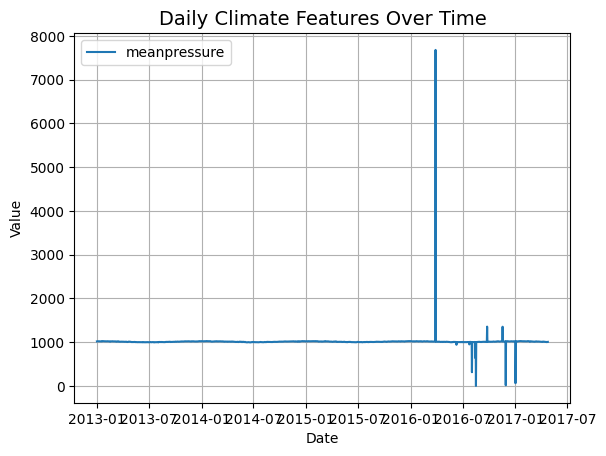

In [ ]:
# Plot all features over time
plot_time_series(df_full, ['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
                'Daily Climate Features Over Time')

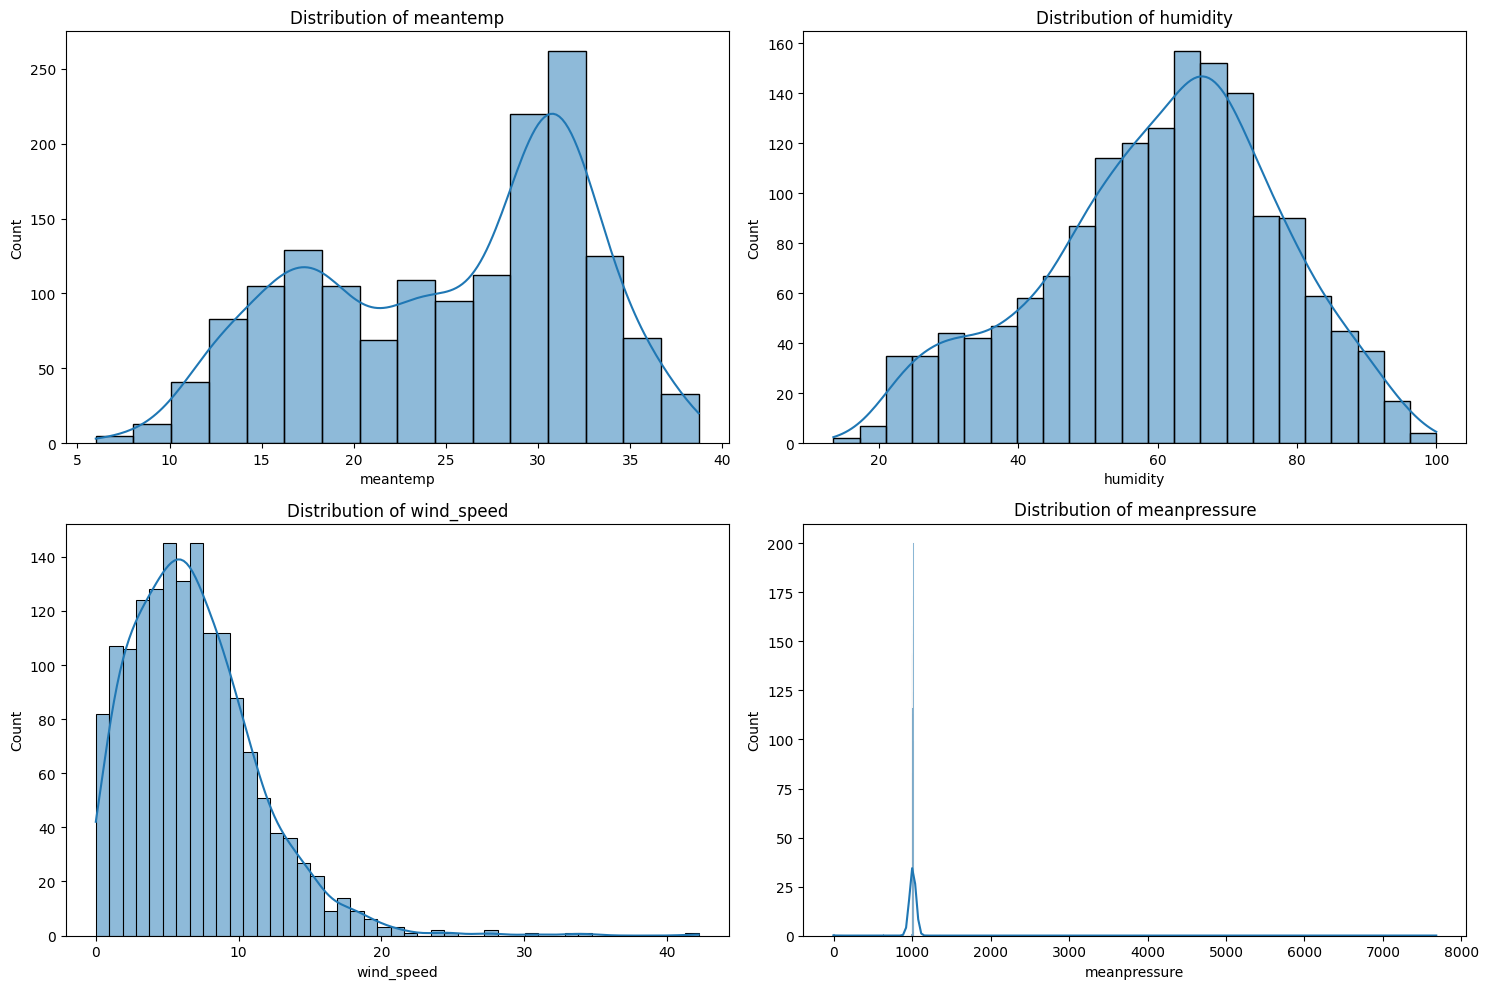

In [ ]:
def plot_feature_distributions(df):
    """Plot distributions of all features"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure']):
        sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
        axes[i//2, i%2].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

plot_feature_distributions(df_full)

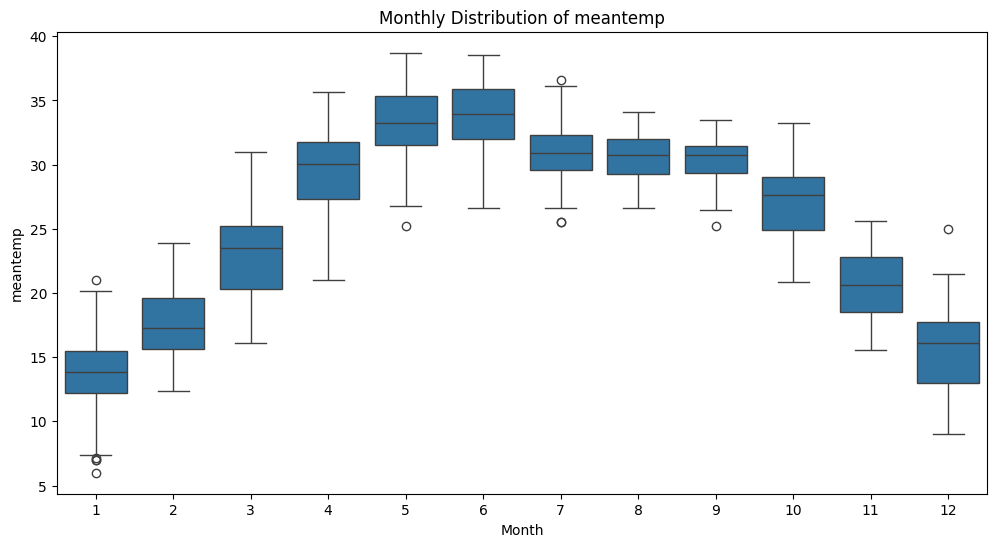

In [ ]:
def plot_monthly_boxplots(df, col):
    """Plot boxplots by month for a given feature"""
    df['month'] = df.index.month
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='month', y=col, data=df)
    plt.title(f'Monthly Distribution of {col}')
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.show()

plot_monthly_boxplots(df_full, 'meantemp')

# **Feature Engineering**

In [ ]:
def create_features(df):
    df = df.copy()

    # Convert 'date' column to datetime and set as index if not already
    if not isinstance(df.index, pd.DatetimeIndex):
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)

    # Time features
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    df['quarter'] = df.index.quarter
    df['season'] = df['month'] % 12 // 3 + 1

    # Lag features
    df['meantemp_lag1'] = df['meantemp'].shift(1) #day before
    df['meantemp_lag7'] = df['meantemp'].shift(7) #last 7 days
    # Rolling statistics
    df['meantemp_rolling_mean7'] = df['meantemp'].rolling(window=7).mean()
    df['meantemp_rolling_std7'] = df['meantemp'].rolling(window=7).std()

    # Drop rows with NaN values from lag features
    df.dropna(inplace=True) #the first 7 days =null && the first day =null

    return df

df_full = create_features(df_full)
df_train = create_features(df_train)
df_test = create_features(df_test)

# **Split Data**

In [ ]:
def prepare_data(df, target='meantemp'):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

In [ ]:
X_train, y_train = prepare_data(df_train)
X_test, y_test = prepare_data(df_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1455, 15), (107, 15), (1455,), (107,))

# **Modelling**

In [ ]:
# Model dictionary
models = {
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVR": SVR()
}

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import numpy as np

# Train and evaluate models
ModelName = []
ModelAccuracy = []

for nameModel, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Predict on test data

    ModelName.append(nameModel)
    ModelAccuracy.append([
         mean_absolute_error(y_test, y_pred),
         mean_squared_error(y_test, y_pred),
         np.sqrt(mean_squared_error(y_test, y_pred)),
         r2_score(y_test, y_pred)
    ])
# Convert results to DataFrame
Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['MAE', 'MSE', 'RMSE', 'R2 Score'])
Model_accuracy

100%|██████████| 5/5 [00:01<00:00,  2.81it/s]


,MAE,MSE,RMSE,R2 Score
LinearRegression,1.262790,2.630794,1.621972,0.936353
KNeighborsRegressor,1.940342,5.862769,2.421315,0.858163
DecisionTreeRegressor,1.655074,4.244775,2.060285,0.897307
RandomForestRegressor,1.190780,2.193884,1.481176,0.946924
SVR,6.914670,63.509766,7.969301,-0.536486


Best Model: The RandomForestRegressor is the best-performing model overall, with the lowest MSE and RMSE, and the highest R² score.

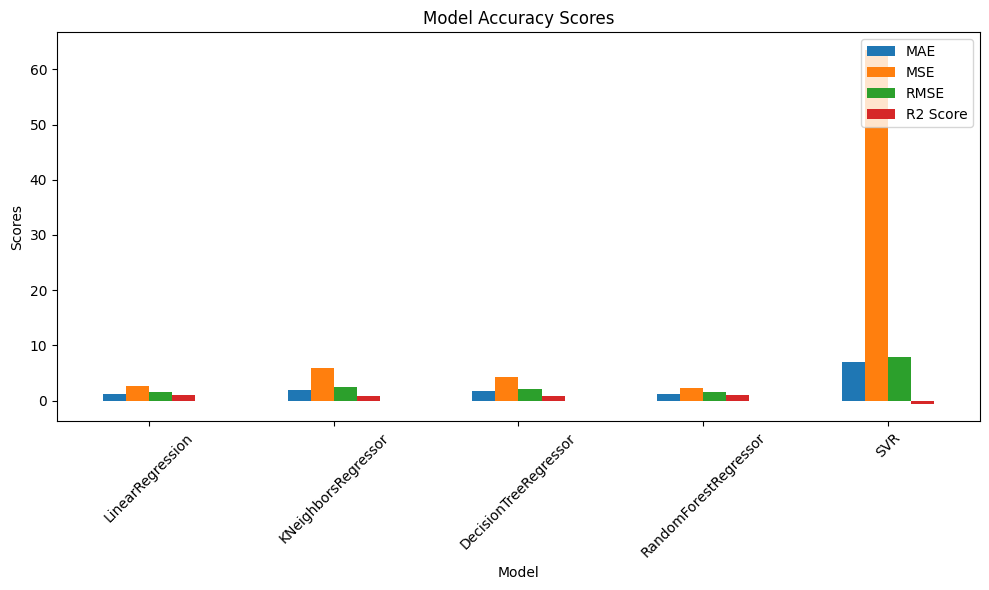

In [ ]:
Model_accuracy.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45) # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout() # Adjust layout to fit labels

# Display the plot
plt.show()

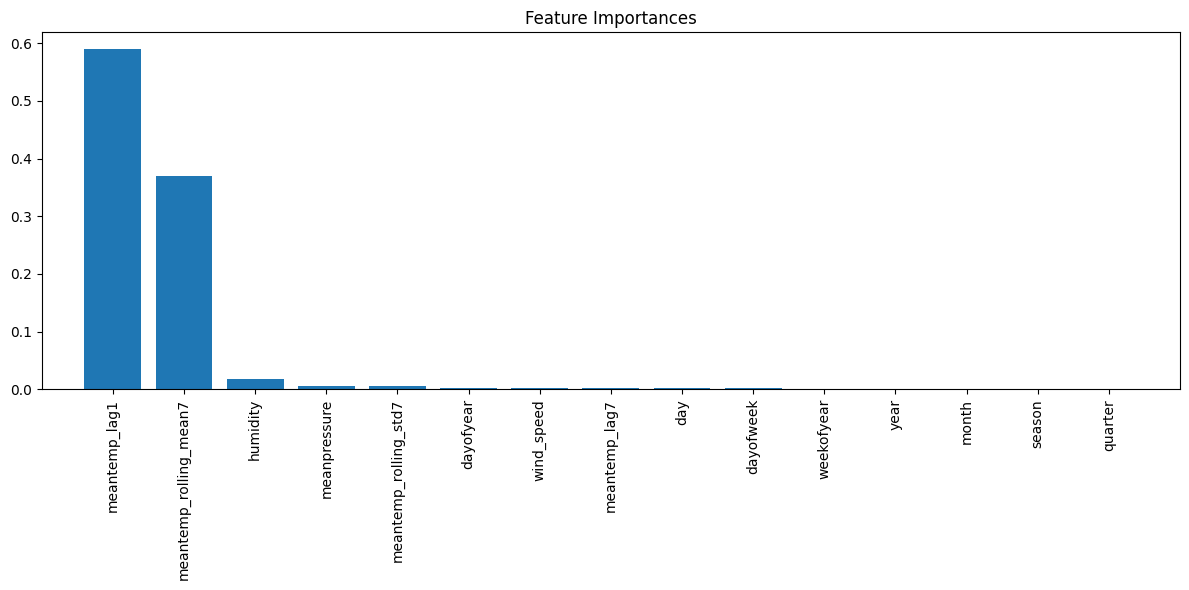

In [ ]:
def plot_feature_importance(model, X_train):
    """Plot feature importance for tree-based models"""
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 6))
        plt.title("Feature Importances")
        plt.bar(range(X_train.shape[1]), importances[indices], align="center")
        plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        plt.show()

# Plot feature importance for the best model (Random Forest)
plot_feature_importance(models['RandomForestRegressor'], X_train)

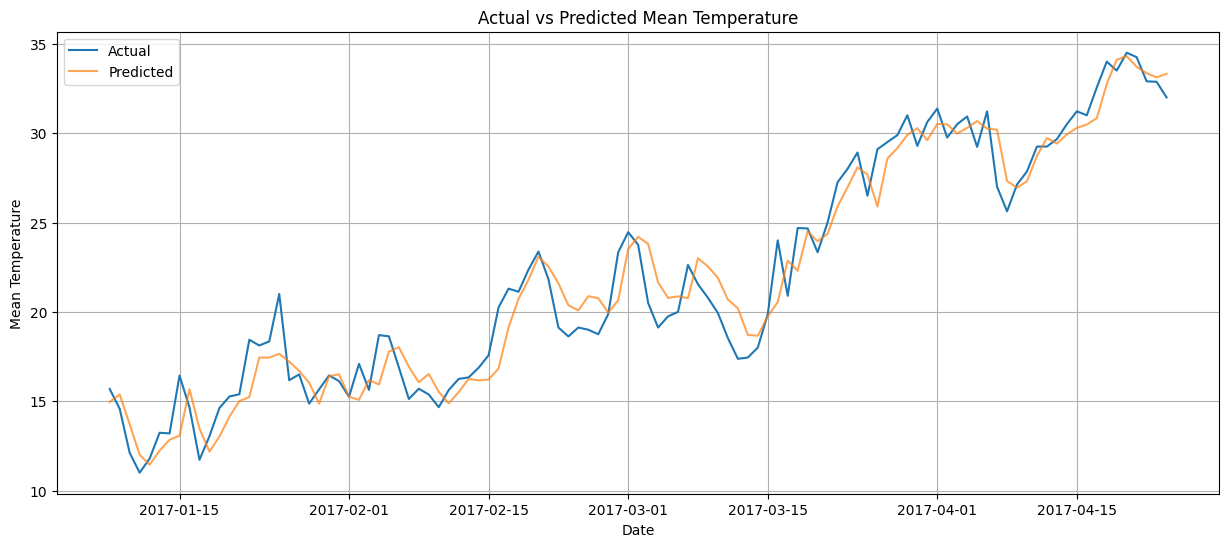

In [ ]:
def plot_predictions(model, X_test, y_test):
    """Plot actual vs predicted values"""
    y_pred = model.predict(X_test)

    plt.figure(figsize=(15, 6))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
    plt.title('Actual vs Predicted Mean Temperature')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot predictions from the best model
best_model = models['RandomForestRegressor']
plot_predictions(best_model, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='r2')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best R² score on validation:", grid.best_score_)


best_rf = grid.best_estimator_


Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score on validation: 0.963974343378509
